In [122]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

In [123]:
%pwd

'E:\\Problem_Solve'

In [124]:
%cd "E:\\Problem_Solve"

E:\Problem_Solve


In [125]:
Mover_1 = pd.read_csv("E:\\Problem_Solve\\Movers\\Sample_Mover (1).csv")

In [126]:
Mover_2 = pd.read_csv("E:\\Problem_Solve\\Movers\\Sample_Mover (2).csv")

In [127]:
Mover_3 = pd.read_csv("E:\\Problem_Solve\\Movers\\Sample_Mover (3).csv")

In [128]:
Mover_4 = pd.read_csv("E:\\Problem_Solve\\Movers\\Sample_Mover (4).csv")

In [129]:
Nbors = pd.read_csv("E:\\Problem_Solve\\Neighbors\\Sample_Neighbor.csv")

In [130]:
cus_1 = pd.read_csv("E:\\Problem_Solve\\PastCustomers\\Customer_List (1).csv")

In [131]:
cus_2 = pd.read_csv("E:\\Problem_Solve\\PastCustomers\\Customer_List (2).csv")

In [132]:
cus_3 = pd.read_csv("E:\\Problem_Solve\\PastCustomers\\Customer_List (3).csv")

In [133]:
cus_4 = pd.read_csv("E:\\Problem_Solve\\PastCustomers\\Customer_List (4).csv")

In [134]:
cus_5 = pd.read_csv("E:\\Problem_Solve\\PastCustomers\\Customer_List (5).csv")

In [135]:
cus_6 = pd.read_csv("E:\\Problem_Solve\\PastCustomers\\Customer_List (6).csv")

In [136]:
cus_7 = pd.read_csv("E:\\Problem_Solve\\PastCustomers\\Customer_List (7).csv")

In [137]:
cus_8 = pd.read_csv("E:\\Problem_Solve\\PastCustomers\\Customer_List (8).csv")

In [138]:
cus_9 = pd.read_csv("E:\\Problem_Solve\\PastCustomers\\Customer_List (9).csv")

In [139]:
frames = [Mover_1,Mover_2,Mover_3,Mover_4,Nbors,cus_1,cus_2,cus_3,cus_4,cus_5,cus_6,cus_7,cus_8,cus_9]

In [140]:
total_concat = pd.concat(frames)
total_concat.rename(columns ={"address":'Address Line'}, inplace = True) #Concatenate all  target address data
total_concat.head(2)

,Address Line,city,state,zip,zip-4
0,158 Tionesta Ridge Ln,Henderson,NV,89012,4425
1,1867 Desert Forest Way,Henderson,NV,89012,2263


In [141]:
Sample_Sales = pd.read_csv("Sample_Sales.csv")

In [142]:
Sample_Sales.head(3)

,Invoice Numbers,Customer Name,Address Line,City,St,Zip Code,Email Address,Product Number,Product Description,Qty,Invoicetotal
0,31507427,AARON HARRIS,8685 VIA NAPOLEONE CIR,LAS VEGAS,NV,89143.0,abharis@gmail.com,SIL-PS-MTXL,SILVER CHIL PS TXL (SEALY-BEK,1.0,4770.94
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SIL-F-MTXL,SILVER CHILL FIRM TXL,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MCE,120DAY EXC 20% FEE TO RETURN,1.0,NaN


In [143]:
merge_data = pd.merge(total_concat,Sample_Sales, on ="Address Line", how = 'inner') 
#Merge data to get address who received address 

In [144]:
merge_data.head(3)

,Address Line,city,state,zip,zip-4,Invoice Numbers,Customer Name,City,St,Zip Code,Email Address,Product Number,Product Description,Qty,Invoicetotal
0,513 HERITAGE BRIDGE AVE,HENDERSON,NV,89011,2670,30505929,RAY BRANSTETTER,HENDERSON,NV,89011.0,litascoffee@gmail.com,TRU-SCK,TRUST SPLIT CAL KING MATT,1.0,1056.65
1,513 HERITAGE BRIDGE AVE,HENDERSON,NV,89011,2670,30505929,RAY BRANSTETTER,HENDERSON,NV,89011.0,litascoffee@gmail.com,TRU-SCK,TRUST SPLIT CAL KING MATT,1.0,1056.65
2,6244 SILVER BANK ST,NORTH LAS VEGAS,NV,89031,4207,31505568,UCHENNA LEWIS,NORTH LAS VEGAS,NV,89031.0,uchenna.lewis@yahoo.com,TRA-PSPT-MQ-FS,FLOOR MODEL TRADITIONAL PS PT,1.0,849.63


In [145]:
print(merge_data[['Qty','Invoicetotal']].describe())

             Qty  Invoicetotal
count  73.000000     85.000000
mean    1.054795   1571.128353
std     0.229154   2396.774171
min     1.000000  -3896.990000
25%     1.000000    162.550000
50%     1.000000    910.330000
75%     1.000000   2785.190000
max     2.000000  10178.180000


In [146]:
print(Sample_Sales[['Qty','Invoicetotal']].describe())

               Qty  Invoicetotal
count  1204.000000    260.000000
mean      1.148671   1278.939885
std       0.391501   2097.553344
min       1.000000  -3896.990000
25%       1.000000      0.000000
50%       1.000000    595.505000
75%       1.000000   2006.715000
max       4.000000  10178.180000


Question:1. Revenue from Matched Sales

In [147]:
Revenue_match=merge_data.Invoicetotal.sum()
Revenue_match=Revenue_match.round()
print("Revenue from Matched Sale:",Revenue_match)

Revenue from Matched Sale: 133546.0


Question:2. Total Revenue

In [148]:
Revenue_total = Sample_Sales.Invoicetotal.sum()
Revenue_total=Revenue_total.round()
print("Total Revenue:",Revenue_total)

Total Revenue: 332524.0


Question:3.  Percentage of Total Revenue

In [149]:
print("Percentage of Total Revenue:",(Revenue_match/Revenue_total)*100)

Percentage of Total Revenue: 40.16131166472194


Question:4. Revenue by Audience Type

In [150]:
frames_mover = [Mover_1,Mover_2,Mover_3,Mover_4]
mover_concat = pd.concat(frames_mover) # Concat by Audience type Movers
mover_concat.rename(columns={'address':'Address Line'},inplace = True) 
merge_mover = pd.merge(Sample_Sales,mover_concat, on ="Address Line", how = 'inner') # Joining of sales data with merged data
Revenue_mover=merge_mover.Invoicetotal.sum()
Revenue_mover=Revenue_mover.round()
Revenue_mover

0.0

Here, we can say that for Movers address maping not usefull

In [153]:
Nbors.rename(columns={'address':'Address Line'},inplace = True)
merge_Nbors = pd.merge(Nbors,Sample_Sales, on ="Address Line", how = 'left')
Revenue_Nbors=merge_Nbors.Invoicetotal.sum()
Revenue_Nbors=Revenue_Nbors.round()
Revenue_Nbors

17790.0

For Neighbors address maping is usefull and it's consists of 13.3% of the revenue of the Matched Sales

In [154]:
frames_cus = [cus_1,cus_2,cus_3,cus_4,cus_5,cus_6,cus_7,cus_8,cus_9]
cus_concat = pd.concat(frames_cus)
cus_concat.rename(columns={'address':'Address Line'},inplace = True)
merge_cus = pd.merge(cus_concat,Sample_Sales, on ="Address Line", how = 'inner')
Revenue_cus=merge_cus.Invoicetotal.sum()
Revenue_cus=Revenue_cus.round()
Revenue_cus

115756.0

For the Past Customers address maping is very useful and it's consists of 86.7% of the Mtched Sales

Question.5: Percentage of Total Revenue by Audience Type

In [155]:
print("% Revenue by Past Customer:", (Revenue_cus/Revenue_total*100).round())
print("% Revenue by Neighbors:", (Revenue_Nbors/Revenue_total*100).round())
print("% Revenue by Past Customer:", (Revenue_mover/Revenue_total*100).round())

% Revenue by Past Customer: 35.0
% Revenue by Neighbors: 5.0
% Revenue by Past Customer: 0.0


Question.6: Number of Matched Customers(Unique Transction)

In [156]:
len(merge_data['Customer Name'].unique())

61

It's show that number of unique Customer Name is 61

Question.7: Number of Matched Sales (Total Transction)

In [157]:
len(merge_data['Invoice Numbers'])

85

It's show that number of match sales is 85

Question.8: Total Customers (Unique Transactions)

In [158]:
len(Sample_Sales['Customer Name'].unique())

170

Total Customers (Unique Transactions) is 170

Question.9: Total Sales (Total Transactions)

In [159]:
len(Sample_Sales['Invoice Numbers'])

1373

Total Sales (Total Transactions) is 262

Question.10: Percentage of Total Customers

In [160]:
(len(merge_data['Customer Name'].unique())/len(Sample_Sales['Customer Name'].unique()))*100

35.88235294117647

So, percentage of Total Customers is 35.9

Question.11: Percentage of Total Sales

In [161]:
(len(merge_data['Invoice Numbers'])/len(Sample_Sales['Invoice Numbers']))*100

6.190823015294974

So, Percentage of Total Sales is 6.190

Question.12: Avg. Transaction Value

In [162]:
Sample_Sales['Invoicetotal'].mean()

1278.9398846153847

Avg. Transaction Value is 1278.94

Question.13: Avg. Matched Transaction Value

In [163]:
merge_data['Invoicetotal'].mean()

1571.1283529411764

Avg. Matched Transaction Value is 1571.12835

Question.14: Avg. Transaction Value by Audience Type

In [164]:
frames_mover = [Mover_1,Mover_2,Mover_3,Mover_4]
mover_concat = pd.concat(frames_mover)
mover_concat.rename(columns={'address':'Address Line'},inplace = True)
merge_mover = pd.merge(mover_concat,Sample_Sales, on ="Address Line", how = 'left')
merge_mover['Invoicetotal'].mean()

nan

So, No Avg Transction value for Movers

In [165]:
Nbors.rename(columns={'address':'Address Line'},inplace = True)
merge_Nbors = pd.merge(Nbors,Sample_Sales, on ="Address Line", how = 'inner')
merge_Nbors['Invoicetotal'].mean()

2223.73125

Average transction value for Neighbors is 2223.73125

In [166]:
frames_cus = [cus_1,cus_2,cus_3,cus_4,cus_5,cus_6,cus_7,cus_8,cus_9]
cus_concat = pd.concat(frames_cus)
cus_concat.rename(columns={'address':'Address Line'},inplace = True)
merge_cus = pd.merge(cus_concat,Sample_Sales, on ="Address Line", how = 'left')
merge_cus['Invoicetotal'].mean()

1503.3254545454545

Average transction value for Past Customers is 1503.32

Question:15. Sales by Product Description

In [167]:
Sample_Sales.groupby('Product Description',as_index=False)['Invoicetotal'].sum() 
# Here we group by Product Description and get the Invoice total of each group

,Product Description,Invoicetotal
0,10 YR ADJUSTABLE BASE WARRANTY,0.00
1,10YR ADJ BASE WARRANTY X2BASES,0.00
2,120DAY EXC 20% FEE TO RETURN,0.00
3,41X60 DUVET&BLANKET GREY/TEAL,0.00
4,600TC BLEND ASH EASTKING SHEET,0.00
...,...,...
280,VILLA PT TWIN (SHER-BT),184.23
281,VILLA QUEEN (SHER-BQ),151.71
282,VILLA TWIN (SHER-BT),195.07
283,WEIGHTED BLANKET 15 POUNDS,0.00


Question:16. Matched Sales by Product Description

In [168]:
print("Sales by Product Description")
merge_data.groupby('Product Description',as_index=False)['Invoicetotal'].sum()

Sales by Product Description


,Product Description,Invoicetotal
0,ADAPT MEDIUM HYBRID FULL (TEMP,3232.42
1,ADAPT MEDIUM HYBRID TXL (TEMP-,6318.95
2,ADAPT MEDIUM TXL (TEMP-BEK),2707.20
3,ADAPT MID COOLING PILLOW QUEEN,0.00
4,AS-IS NO EXC SILVER CHIL PS EK,1300.50
5,CAL KING 5 SIDED MATT COVER,151.71
6,CAL KING 5 SIDED OMNIPHASE CVR,853.38
7,CASSATT PLUSH QUEEN (SF-BQ),2342.51
8,CONFORM 8 MATT N BOX QUEEN,541.86
9,DOUGH W/ Z-GEL PILLOW QN,86.70


Question:17. Matched Sales by Product Description by Audience Type

In [169]:
merge_mover.groupby(['Product Description',],as_index=False)['Invoicetotal'].sum()
# For Movers there is no such Product

,Product Description,Invoicetotal


In [170]:
merge_Nbors.groupby(['Product Description',],as_index=False)['Invoicetotal'].sum()
# For Neighbors grouped by Product Description

,Product Description,Invoicetotal
0,FLOOR MODEL TRADITIONAL PS PT,849.63
1,HURSTON PT EASTKING(SF2-BEK),4639.18
2,LUX ADAPT FIRM CAL KING,4660.13
3,LUX ADAPT SOFT EASTKING,6156.41
4,TRUST SPLIT CAL KING MATT,1056.65
5,TXL 5 SIDED MATT COVER,97.53


In [171]:
merge_cus.groupby(['Product Description',],as_index=False)['Invoicetotal'].sum()
# For Past customers grouped by Product Description

,Product Description,Invoicetotal
0,ADAPT MEDIUM HYBRID FULL (TEMP,3232.42
1,ADAPT MEDIUM HYBRID TXL (TEMP-,6318.95
2,ADAPT MEDIUM TXL (TEMP-BEK),2707.20
3,ADAPT MID COOLING PILLOW QUEEN,0.00
4,AS-IS NO EXC SILVER CHIL PS EK,1300.50
5,CAL KING 5 SIDED MATT COVER,151.71
6,CAL KING 5 SIDED OMNIPHASE CVR,853.38
7,CASSATT PLUSH QUEEN (SF-BQ),2342.51
8,CONFORM 8 MATT N BOX QUEEN,541.86
9,DOUGH W/ Z-GEL PILLOW QN,86.70


Question.18: Is this something that you could Automate?

It's possible to automate daily mundane Excel based data tool to aggregate and maipulate CSV file. Some solutions could be:
1. Using ODBC databases with python. Python can connect with pyobdc module for NetSuite 
2. If budget permits, reporting can be done with Power BI tools
3. With pandas any unnecessary informations in csv can be removed and then moved to again to csv format for future use
4. Using Windows Task Schedule python code can be ran at certain times only which may increase data manipulation time

Question.19: Data visulization

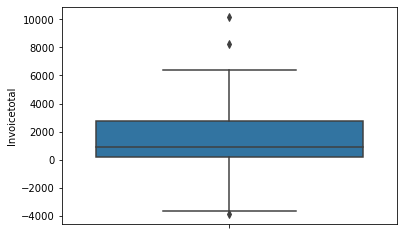

In [172]:
sns.boxplot( y= merge_data['Invoicetotal']) 

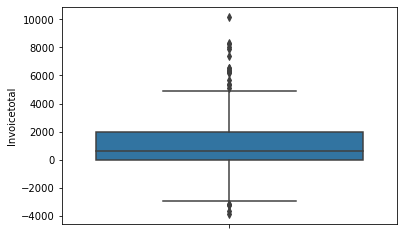

In [173]:
sns.boxplot( y= Sample_Sales['Invoicetotal'])

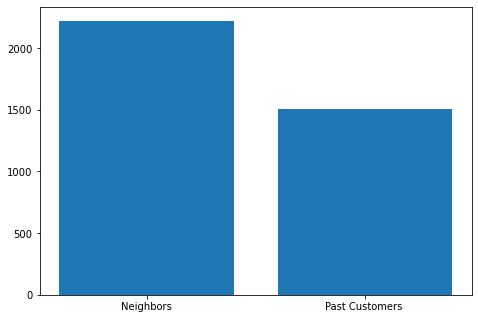

In [174]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Transaction_Value = ['Neighbors', 'Past Customers ','Movers']
Avgerage_Transaction_Value = [merge_Nbors['Invoicetotal'].mean(),merge_cus['Invoicetotal'].mean(),merge_mover['Invoicetotal'].mean()]
ax.bar(Transaction_Value,Avgerage_Transaction_Value)
plt.show()

Here, We can see that mean value of 'Invoicetotal' increased from 1278.939885 to 1571.128353. i.e., increase of almost 23% for the addresses which received ads from esquireadvertising

Text(0.5, 0, 'Frequency')

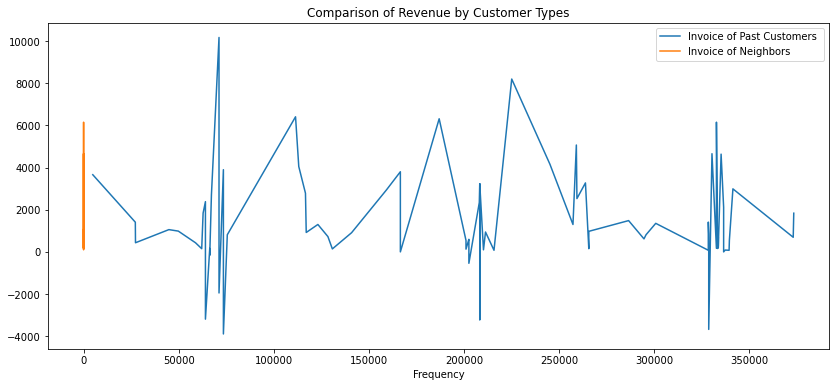

In [175]:
plt.figure(figsize=(14,6))
plt.title('Comparison of Revenue by Customer Types')
sns.lineplot(data = merge_cus['Invoicetotal'],label = 'Invoice of Past Customers ' )
sns.lineplot(data =merge_Nbors['Invoicetotal'],label = 'Invoice of Neighbors')
sns.lineplot(data =merge_mover['Invoicetotal'],label = 'Invoice of Movers')
plt.xlabel("Frequency")

Here, It can be say that for Neighbors catagory purchase practice is consistant one and it goes between 0 to 6000. But for Past customers purchase history is very diverse. It's invoice amount goes upto maximum 10000  and can be negative also. Also frequency of Past Customers can goes upto above 350000 but for Neighbors it is marginal.

                                 Thank You for your time in revewing my code